**Context**

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

**Content**

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

**Acknowledgements**

This public dataset is part of Airbnb, and the original source can be found on this website.

Inspiration
- What can we learn about different hosts and areas?
- What can we learn from predictions? (ex: locations, prices, reviews, etc)
- Which hosts are the busiest and why?
- Is there any noticeable difference of traffic among different areas and what could be the reason for it?

**Column**

    id : listing ID
    name : name of the listing
    host_id : host ID
    host_name : name of the host                     
    neighbourhood_group : location            
    neighbourhood : area                
    latitude : latitude coordinates                     
    longitude : longitude coordinates                      
    room_type : listing space type                     
    price : price in dollars                       
    minimum_nights : amount of nights minimum                
    number_of_reviews : number of reviews               
    last_review : latest review                  
    reviews_per_month : number of reviews per month              
    calculated_host_listings_count : amount of listing per host 
    availability_365 : number of days when listing is available for booking     
    
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv

In [1]:
import numpy as np
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
plt.style.use('fivethirtyeight')


from sklearn.preprocessing import RobustScaler, MinMaxScaler, MaxAbsScaler, LabelEncoder

def find_outlier(x):
    q1 = x.describe()['25%']
    q3 = x.describe()['75%']
    iqr = abs(q1-q3)
    bttm_threshold = q1 - (iqr*1.5)
    top_threshold = q3 + (iqr*1.5)
    outlier = [i for i in x if i < bttm_threshold or i > top_threshold]
    outlier_array = np.array(outlier)
    return outlier_array

In [2]:
peta = geopandas.read_file('nyc_neighborhoods.geojson')

In [3]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Checking Null Value

In [4]:
# Checking null-value in host_name
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## host_name column

In [5]:
df[df['host_name'].isna()].sort_values('calculated_host_listings_count', ascending=False)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
28274,21990808,***SLEEPING IN THE GOLDEN PLACE***,159156636,NaN,Manhattan,Hell's Kitchen,40.75835,-73.99065,Private room,120,1,88,2018-12-14,4.93,3,0
28042,21901156,Best Deal! Lovely place in Manhattan! Time Squ...,159156636,NaN,Manhattan,Hell's Kitchen,40.75656,-73.99063,Private room,120,1,109,2019-01-01,5.97,3,0
27962,21867710,Amazing room in the centre on Manhatten! Welcome!,159156636,NaN,Manhattan,Hell's Kitchen,40.75668,-73.99097,Private room,120,1,89,2019-01-01,5.16,3,0
8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,2019-06-19,3.59,2,318
8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2019-06-19,3.18,2,342
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
15174,12113879,"Sunny, Large West Village 1 BR Near Everything",5300585,NaN,Manhattan,Chelsea,40.73949,-73.99801,Entire home/apt,220,4,81,2019-07-02,2.11,1,217
32193,25180572,Beautiful Cozy Studio Apt. UWS,119609345,NaN,Manhattan,Upper West Side,40.77701,-73.97667,Entire home/apt,180,4,0,NaN,NaN,1,0
30570,23660605,Private Bedroom w/ Balcony view of Central Park,177146433,NaN,Manhattan,East Harlem,40.79766,-73.94824,Private room,139,1,6,2018-08-12,0.46,1,0
27777,21787094,Spacious and Bright Midtown East Apartment,415290,NaN,Manhattan,Upper East Side,40.76436,-73.96836,Entire home/apt,325,1,0,NaN,NaN,1,0


In [6]:
# Cek yang calculated_host_listings_count > 1
df[(df['host_name'].isna()) & (df['calculated_host_listings_count'] > 1)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,2019-06-19,3.59,2,318
8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2019-06-19,3.18,2,342
27962,21867710,Amazing room in the centre on Manhatten! Welcome!,159156636,NaN,Manhattan,Hell's Kitchen,40.75668,-73.99097,Private room,120,1,89,2019-01-01,5.16,3,0
28042,21901156,Best Deal! Lovely place in Manhattan! Time Squ...,159156636,NaN,Manhattan,Hell's Kitchen,40.75656,-73.99063,Private room,120,1,109,2019-01-01,5.97,3,0
28274,21990808,***SLEEPING IN THE GOLDEN PLACE***,159156636,NaN,Manhattan,Hell's Kitchen,40.75835,-73.99065,Private room,120,1,88,2018-12-14,4.93,3,0


Null value di kolom `host_name` gabisa diapa-apain karena gaada clue satupun untuk ngisinya

---

## name column

In [7]:
df[df['name'].isna()].sort_values('calculated_host_listings_count', ascending=False)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,NaN,5,0
15819,12797684,NaN,69715276,Yan,Manhattan,Upper West Side,40.79843,-73.96404,Private room,100,1,0,NaN,NaN,2,0
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,NaN,1,0
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,NaN,1,0
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,NaN,1,0


In [8]:
# Cek yang calculated_host_listings_count > 1
df[(df['name'].isna()) & (df['calculated_host_listings_count'] > 1)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,NaN,5,0
15819,12797684,NaN,69715276,Yan,Manhattan,Upper West Side,40.79843,-73.96404,Private room,100,1,0,NaN,NaN,2,0


In [9]:
# Cek dengan host_id 50448556
df[df['host_id'] == 50448556]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,NaN,5,0
12827,9788141,Bedroom in UWS,50448556,Miguel,Manhattan,Harlem,40.80518,-73.95099,Private room,100,1,1,2015-12-03,0.02,5,0
12830,9790098,Bedroom in UWS 118th st,50448556,Miguel,Manhattan,Harlem,40.80345,-73.95067,Private room,200,1,0,NaN,NaN,5,0
13071,9896731,BEDROOM IN UWS,50448556,Miguel,Manhattan,Harlem,40.80489,-73.95171,Private room,100,2,1,2015-12-09,0.02,5,0
13091,9902915,BEDROOM IN UWS,50448556,Miguel,Manhattan,Harlem,40.80519,-73.95091,Private room,100,6,0,NaN,NaN,5,0


In [10]:
# Cek dengan host_id 69715276
df[df['host_id'] == 69715276]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
15819,12797684,NaN,69715276,Yan,Manhattan,Upper West Side,40.79843,-73.96404,Private room,100,1,0,NaN,NaN,2,0
15820,12797920,Large Bedroom near Subway,69715276,Yan,Manhattan,Upper West Side,40.79806,-73.96167,Private room,100,1,1,2016-07-31,0.03,2,0


    Setelah mengecek kolom name, kita bisa liat di id 69715276 kemungkinan besar datanya duplicate karena room_type, neighbourhood, minimum_nights, dan availability_365-nya sama. Kemungkinan besar salah satu kolom ini bisa di drop
    
    Tapi disini saya biarkan dulu karena tidak ada bukti apapun yang menyatakan kalo ini duplicate

---

In [11]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Cek last_review dan reviews_per_month

In [12]:
df[df['last_review'].isna()].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365


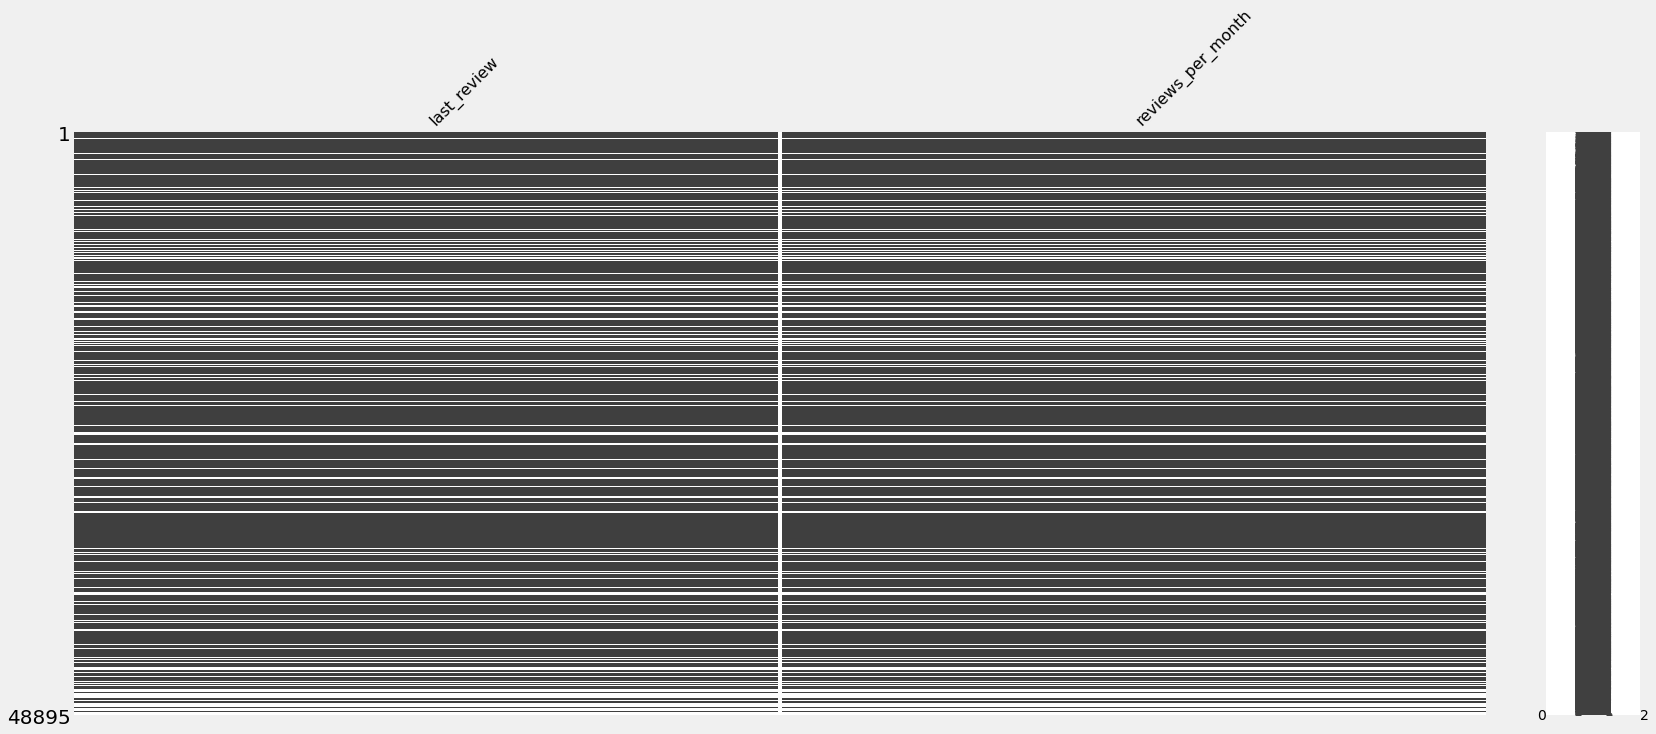

In [13]:
msno.matrix(df[['last_review', 'reviews_per_month']])
plt.show()

    Ini berarti jenis missing-valuenya MNAR : Missing Not At Random. Artinya karena kolom last_review null, makanya reviews_per_month-nya juga null. Ada korelasi di missing valuenya

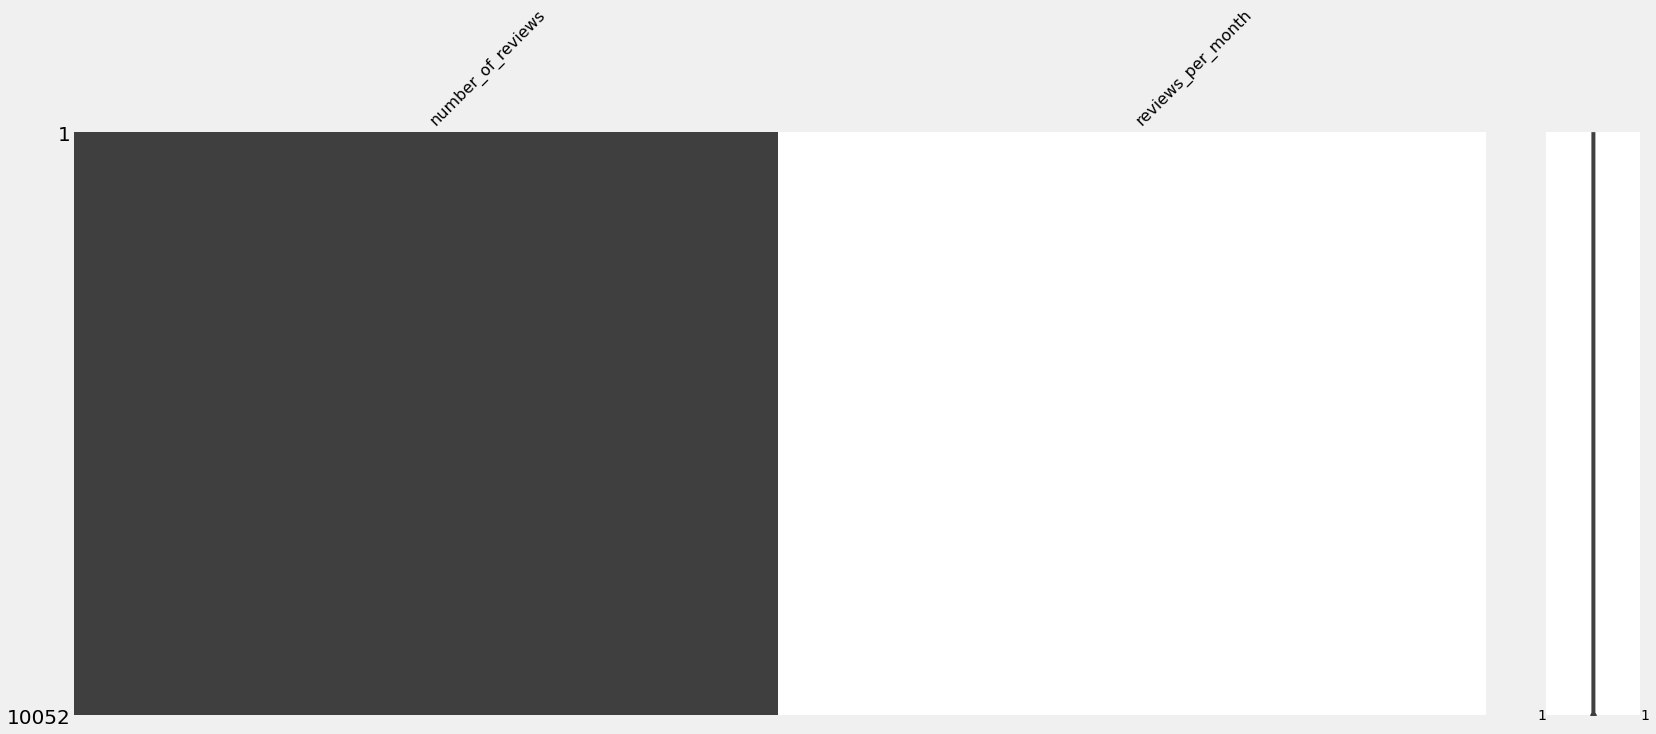

In [14]:
msno.matrix(df[df['number_of_reviews'] == 0][['number_of_reviews', 'reviews_per_month']])
plt.show()

    Jumlah null value di kolom reviews_per_month 10052 dan dari semua kolom tersebut nilai kolom number_of_review-nya 0, berarti kita bisa replace null-value di kolom reviews_per_month dengan nilai 0

In [15]:
# Replacing null-value in reviews_per_month column
df['reviews_per_month'].fillna(0, inplace=True)

In [16]:
# Checking null_value
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Cek kolom last_review

In [17]:
df[df['last_review'].isna()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.0,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,0.0,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,0.0,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,0.0,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,0.0,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,0.0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,0.0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,0.0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,0.0,6,2


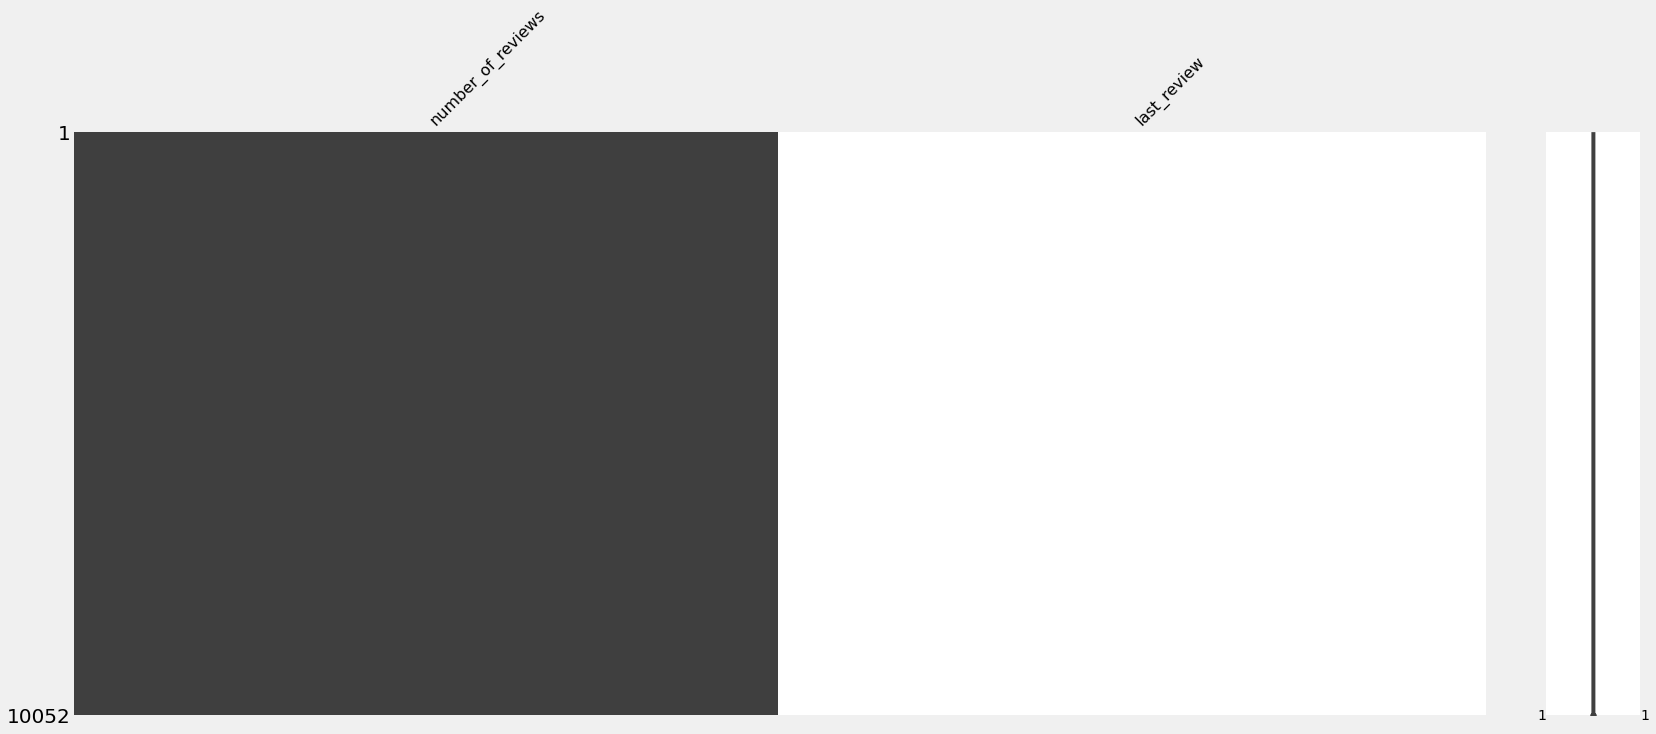

In [18]:
msno.matrix(df[df['last_review'].isna()][['number_of_reviews', 'last_review']])
plt.show()

    Semua data last_review yang null, nilai number_of_reviews-nya ternyata juga 0, artinya kita bisa replace semua last_review yang null dengan nilai 0

In [19]:
# Replacing null value in last_review with 0
df['last_review'].fillna(0, inplace=True)

In [20]:
df.isna().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [21]:
df['last_review'] = pd.to_datetime(df['last_review'])
df[df['last_review'] < pd.to_datetime('2008-01-01')]['last_review'].value_counts()

1970-01-01    10052
Name: last_review, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

**Kolom `last_review` sebelum tahun 2008 semuanya diisi dengan tanggal 1970-01-01 sedangkan data AirBnB ini dimulai dari 2008-2019 jadi 1970-01-01 merupakan null-value yang di replace dengan 0**

---

# Checking Duplicate Row

## Complete Duplicate Row

In [23]:
# Checking duplicated
column_name = ['name', 'host_name', 'neighbourhood_group',
               'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
               'minimum_nights', 'number_of_reviews', 'last_review',
               'reviews_per_month', 'calculated_host_listings_count',
               'availability_365']
duplicates = df.duplicated(subset=column_name, keep=False)
duplicated_rows = df[duplicates]
duplicated_rows

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


        Tidak ada complete duplicate row

## Incomplete Duplicate Row

In [24]:
# Checking duplicated
column_name = ['latitude', 'longitude']
duplicates = df.duplicated(subset=column_name, keep=False)
duplicated_rows = df[duplicates]
duplicated_rows.sort_values('latitude').head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
47284,35675069,Newly Renovated Apartment (47 Buffalo 1F Room #2),268358454,Devin,Brooklyn,Bedford-Stuyvesant,40.67825,-73.92346,Private room,60,1,0,1970-01-01,0.00,1,171
41135,31989484,Blissful Balcony Room,237421509,Lisa,Brooklyn,Bedford-Stuyvesant,40.67825,-73.92346,Private room,45,1,2,2019-03-07,0.39,2,0
9561,7341406,Private Spacious Room with bathroom,38460304,Leon,Brooklyn,Bedford-Stuyvesant,40.68398,-73.94101,Private room,125,4,27,2019-03-09,0.57,2,312
17472,13757434,"PRIVATE LARGE STUDIO FOR YOU, PLUS!",46644337,Sha,Brooklyn,Bedford-Stuyvesant,40.68398,-73.94101,Entire home/apt,90,2,113,2019-06-22,3.08,3,262
42790,33221933,Visitors Dream,250115747,Ivy,Queens,Ridgewood,40.70125,-73.91051,Private room,44,2,9,2019-06-23,3.18,4,154


    Awalnya mungkin terlihat seperti duplicate tapi karena longitude dan latitude dengan perbedaan 0.1 saja jaraknya sangat jauh berarti bisa dilihat ini bukan duplicate row

---

---

# EDA (Exploratory Data Analysis)

In [25]:
categorical_col = []

for column in df.columns:
    if len(df[column].unique()) <= 10:
        print("===============================================================================")
        print(f"{column} : {df[column].unique()}")
        categorical_col.append(column)

neighbourhood_group : ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
room_type : ['Private room' 'Entire home/apt' 'Shared room']


In [26]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Data Correlation

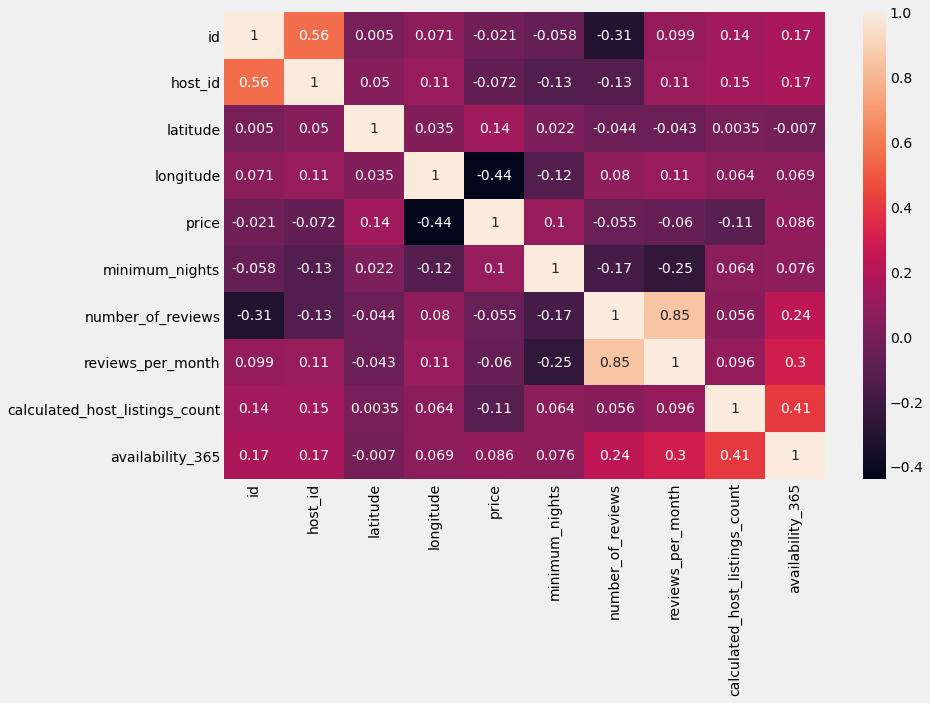

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(method='spearman'), annot=True)
plt.show()

## Data Distribution

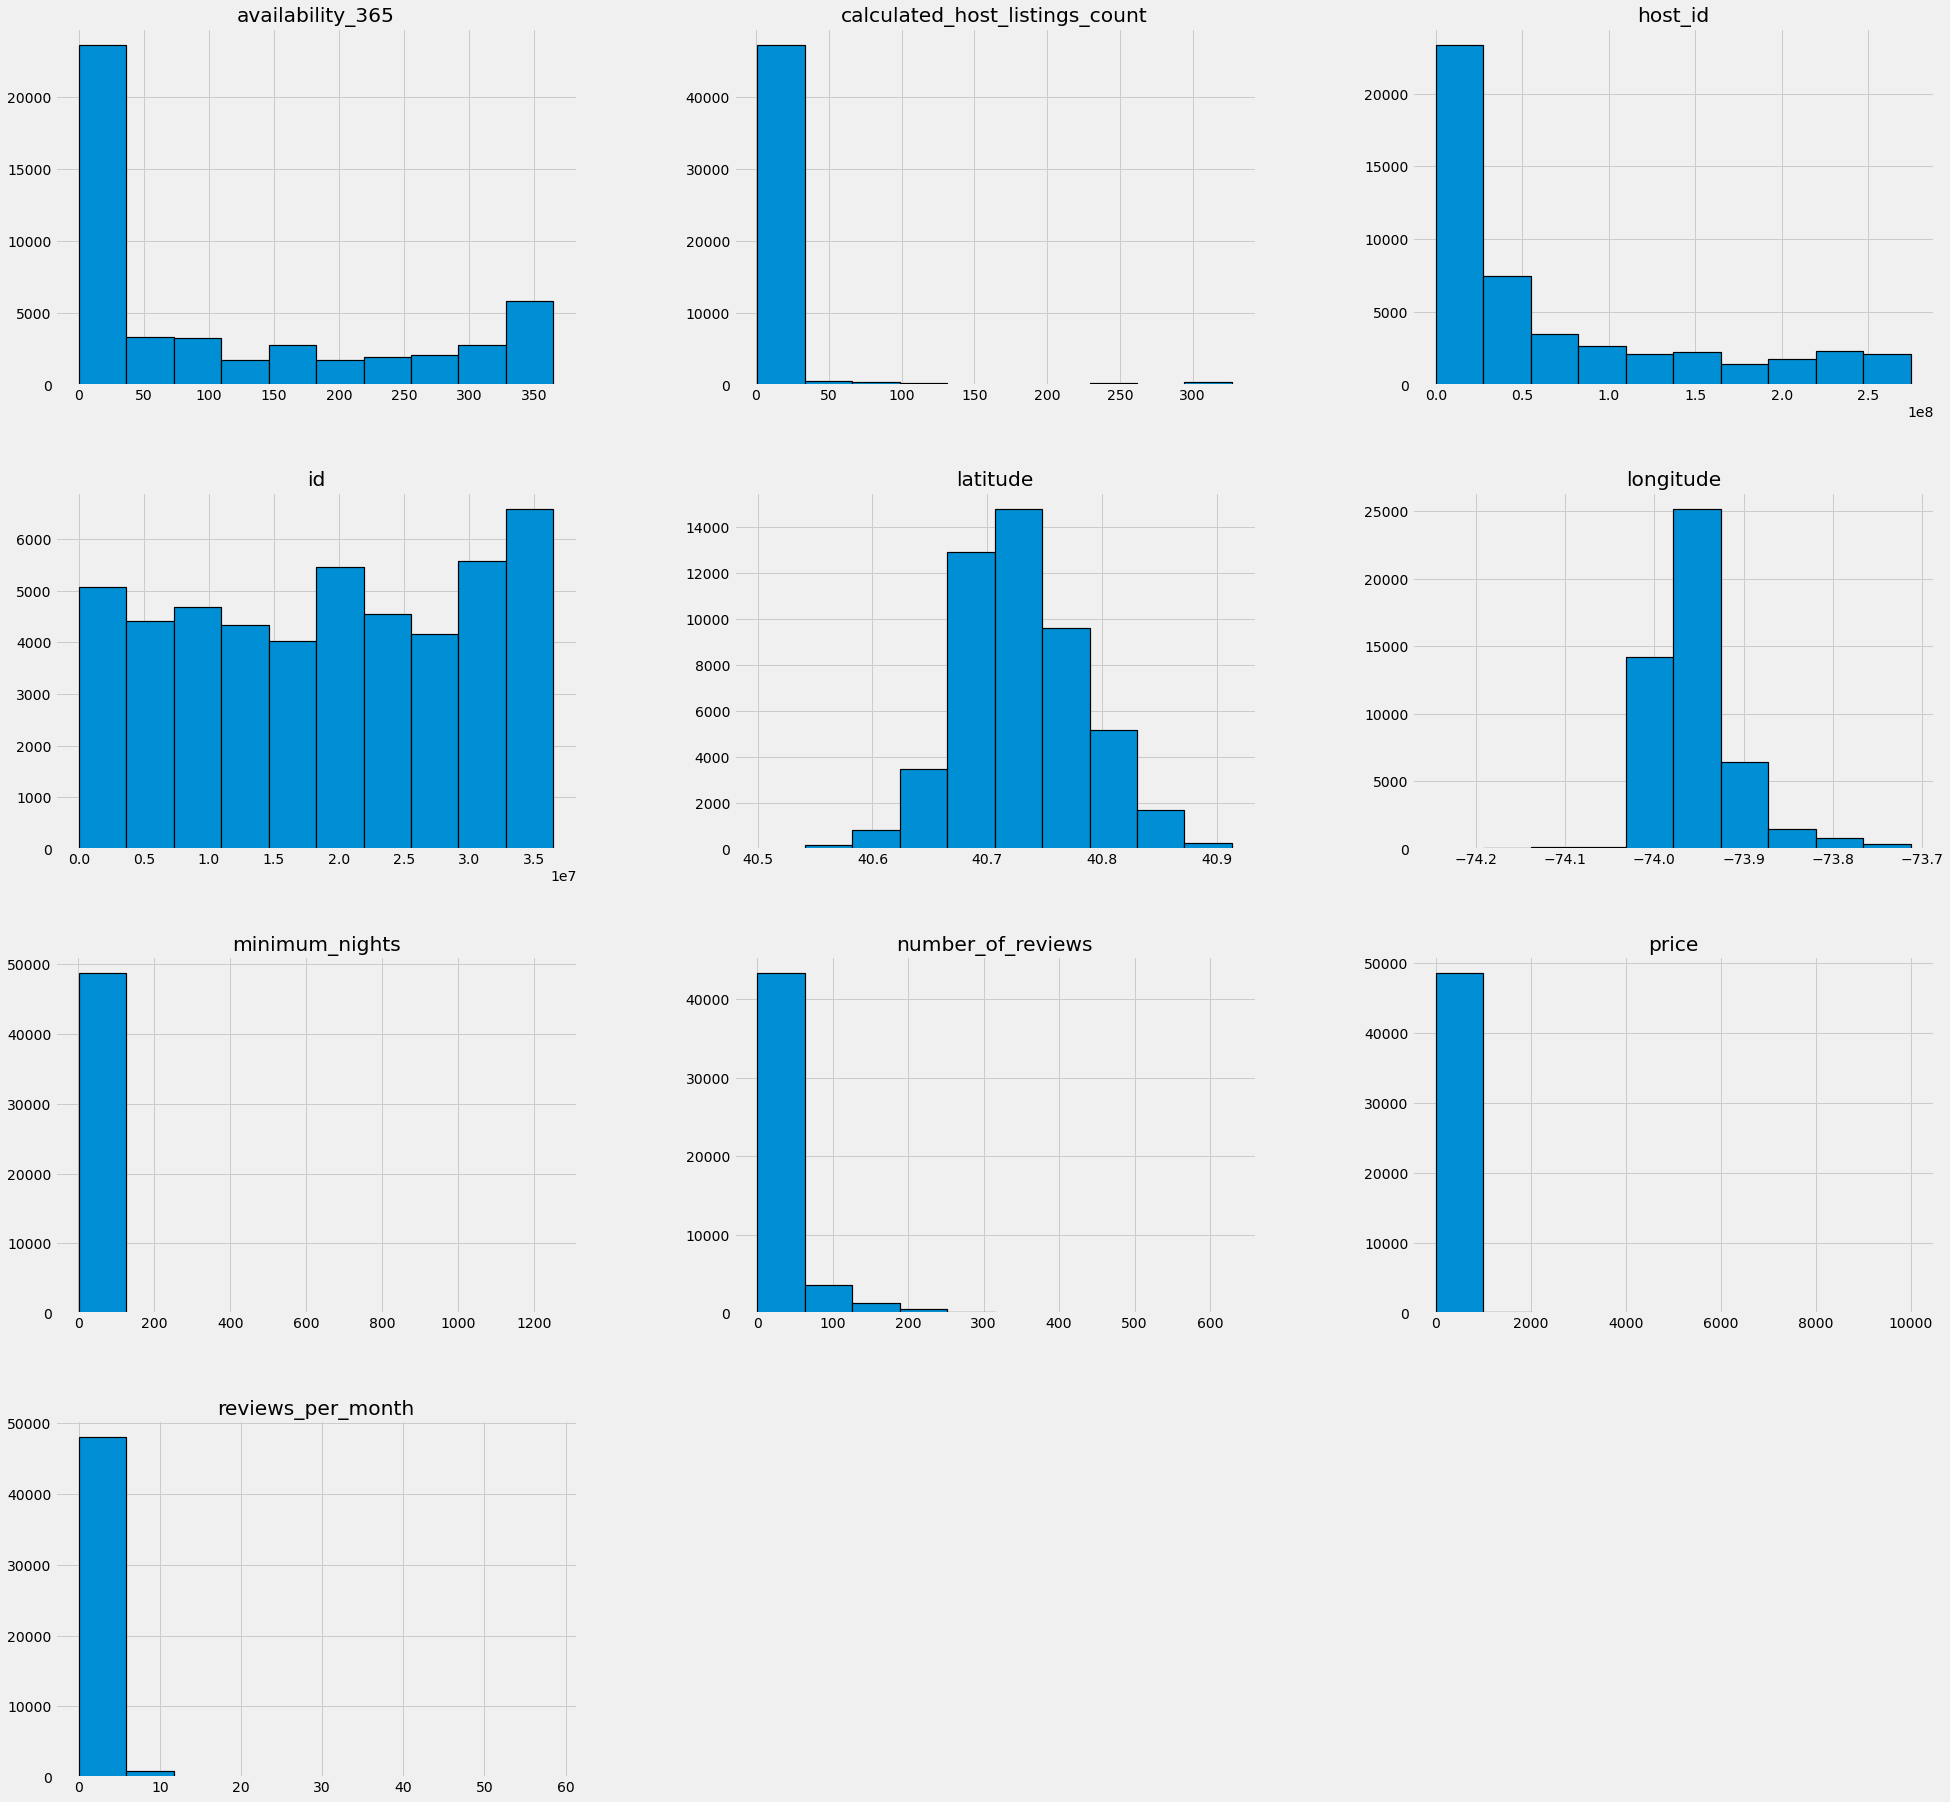

In [28]:
# Visualizing the distribution for every "feature"
df.hist(edgecolor="black", linewidth=1.2, figsize=(30, 30));

In [29]:
# NormalTest for every feature
numerical_feature = ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
          'calculated_host_listings_count', 'availability_365']
for i in numerical_feature:
    k2, p = stats.normaltest(df[i])
    alpha = 0.05
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(f"{i} : The null hypothesis can be rejected")
    else:
        print(f"{i} : The null hypothesis cannot be rejected")

id : The null hypothesis can be rejected
host_id : The null hypothesis can be rejected
latitude : The null hypothesis can be rejected
longitude : The null hypothesis can be rejected
price : The null hypothesis can be rejected
minimum_nights : The null hypothesis can be rejected
number_of_reviews : The null hypothesis can be rejected
reviews_per_month : The null hypothesis can be rejected
calculated_host_listings_count : The null hypothesis can be rejected
availability_365 : The null hypothesis can be rejected


**Tidak ada kolom yang terdistribusi normal**

## Data Outlier

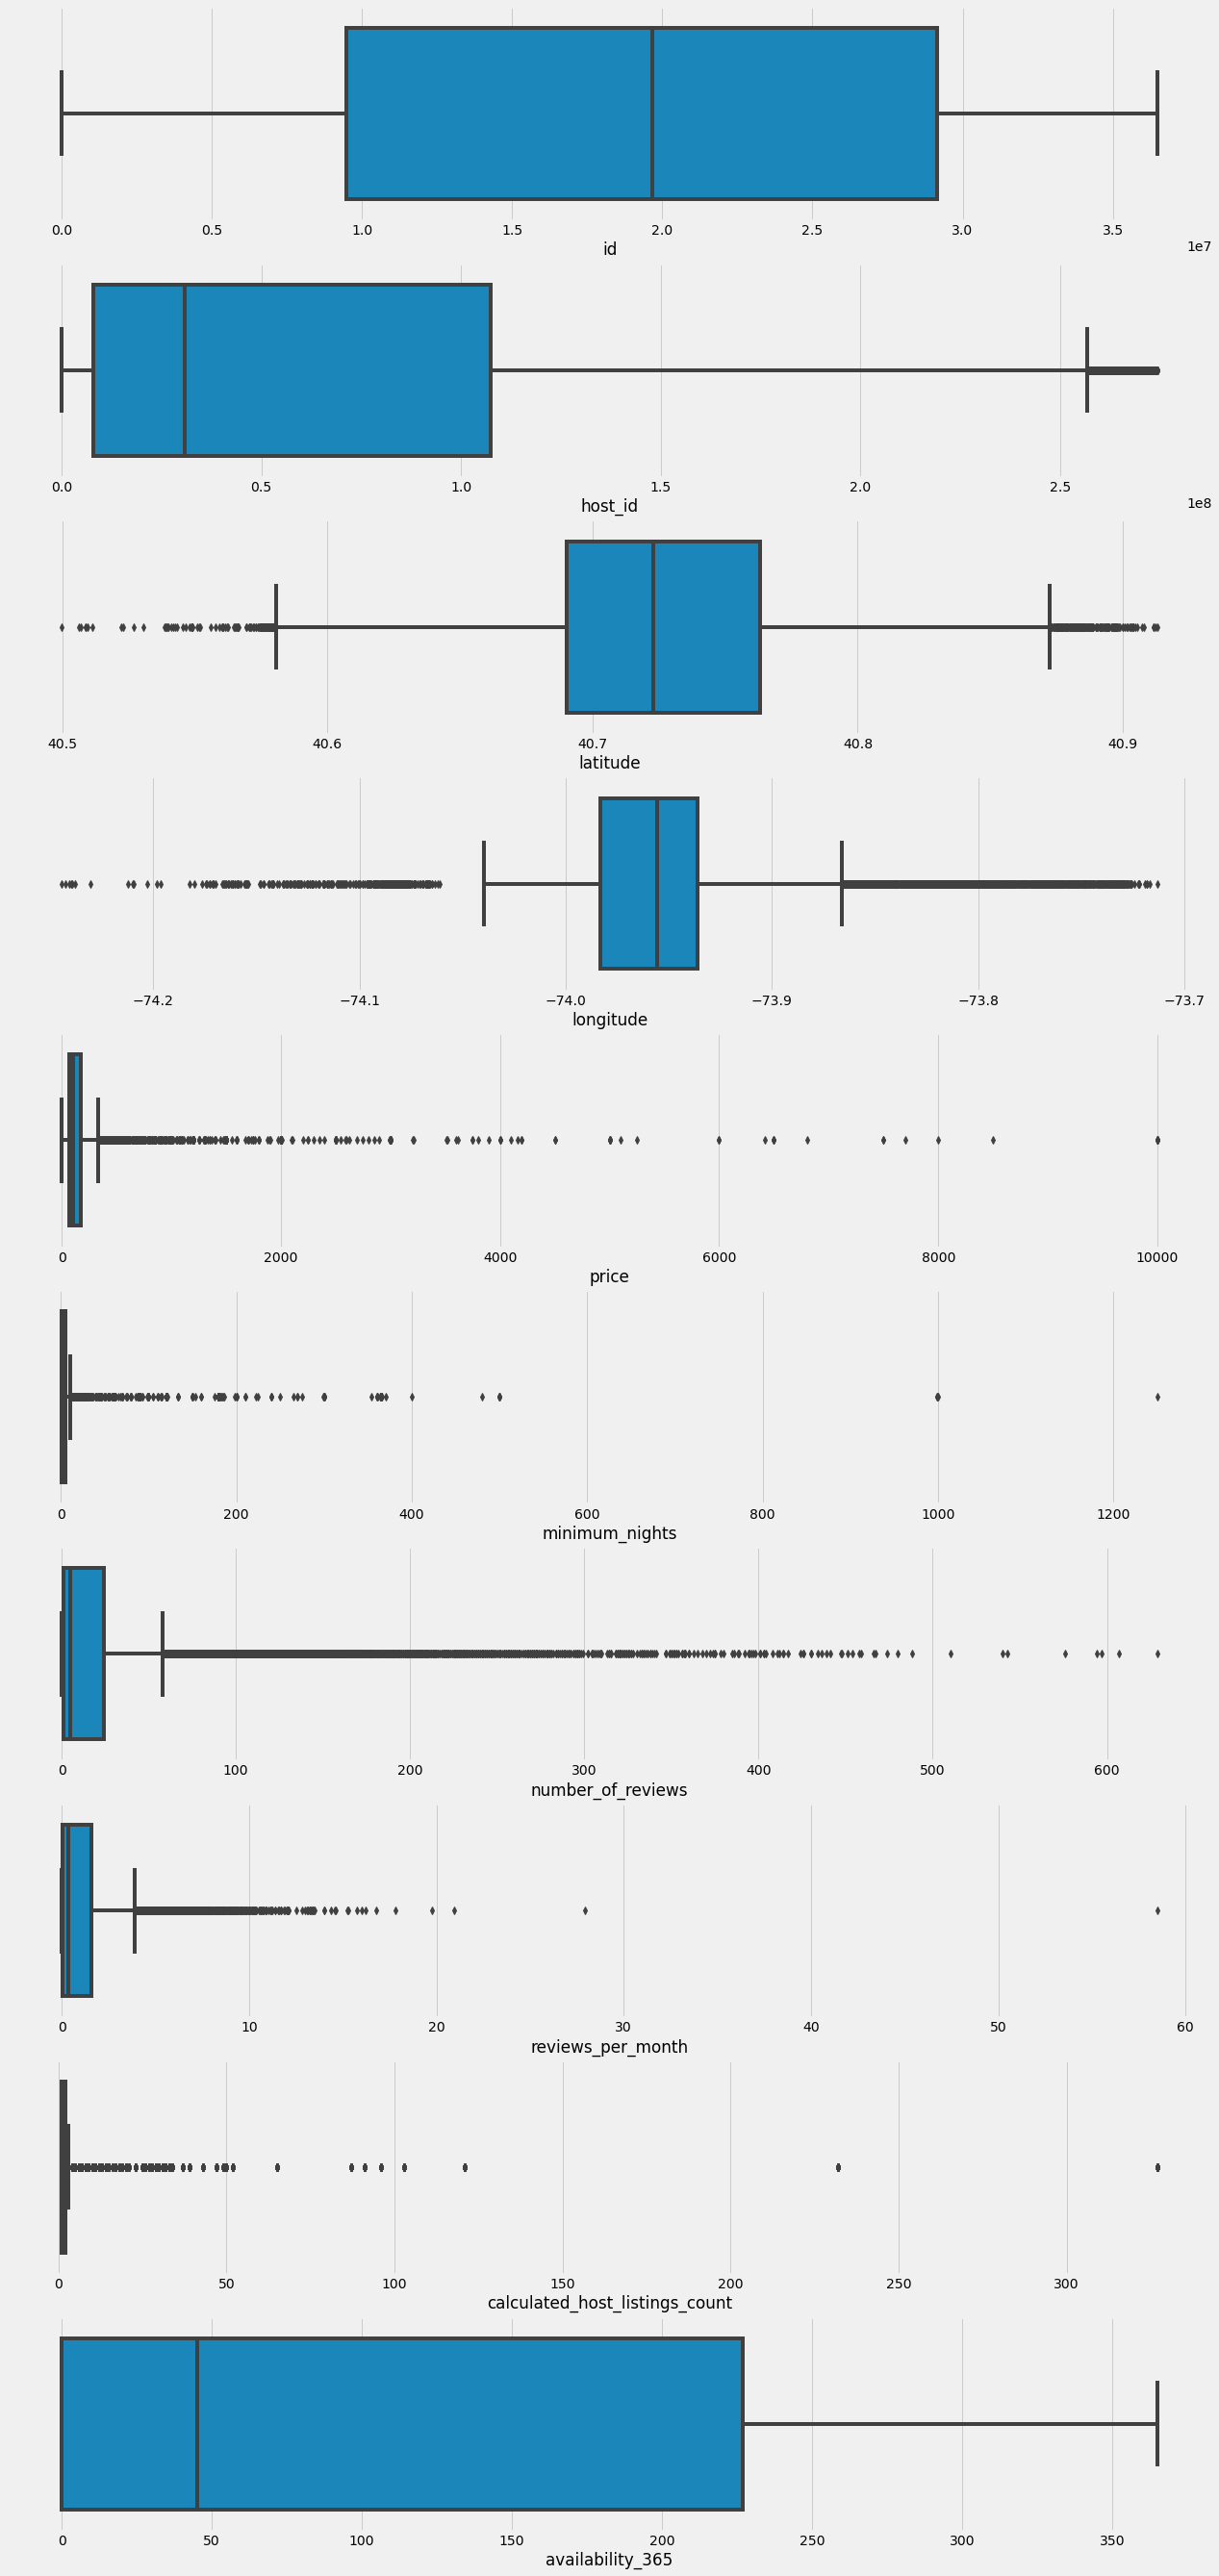

In [30]:
# Checking outlier with boxplot
plt.figure(figsize=(20,45))
position = 1
for i in numerical_feature:
    plt.subplot(10,1,position)
    sns.boxplot(x=i, data=df)
    position += 1
plt.show()
    

In [31]:
# Jumlah outlier disetiap kolom continous

for i in df.describe().columns:
    print(f'kolom {i} memiliki jumlah outlier sebanyak {len(find_outlier(df[i]))}')


kolom id memiliki jumlah outlier sebanyak 0
kolom host_id memiliki jumlah outlier sebanyak 1526
kolom latitude memiliki jumlah outlier sebanyak 425
kolom longitude memiliki jumlah outlier sebanyak 2833
kolom price memiliki jumlah outlier sebanyak 2972
kolom minimum_nights memiliki jumlah outlier sebanyak 6607
kolom number_of_reviews memiliki jumlah outlier sebanyak 6021
kolom reviews_per_month memiliki jumlah outlier sebanyak 3312
kolom calculated_host_listings_count memiliki jumlah outlier sebanyak 7081
kolom availability_365 memiliki jumlah outlier sebanyak 0


**Outlier tidak ditemukan di kolom `id` dan `availability_365`**

## What We Learn from Different Areas

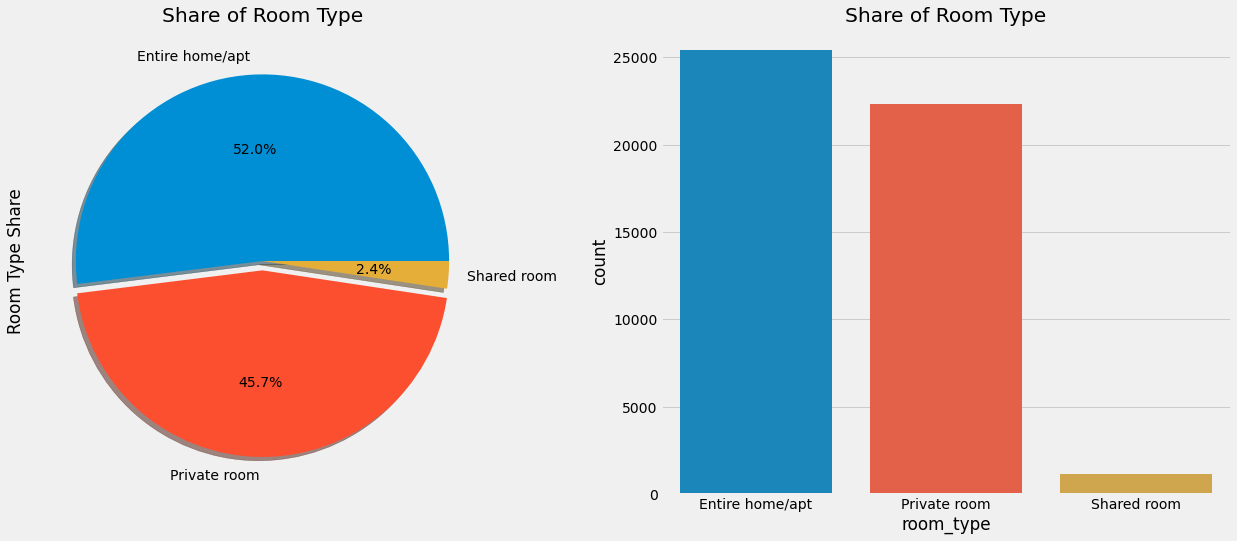

In [32]:
# Check room_type yang paling laku
fig,ax=plt.subplots(1,2,figsize=(20,8))
df['room_type'].value_counts().plot.pie(explode=[0,0.05,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Room Type')
ax[0].set_ylabel('Room Type Share')
sns.countplot('room_type',data=df,ax=ax[1],order=df['room_type'].value_counts().index)
ax[1].set_title('Share of Room Type')
plt.show()

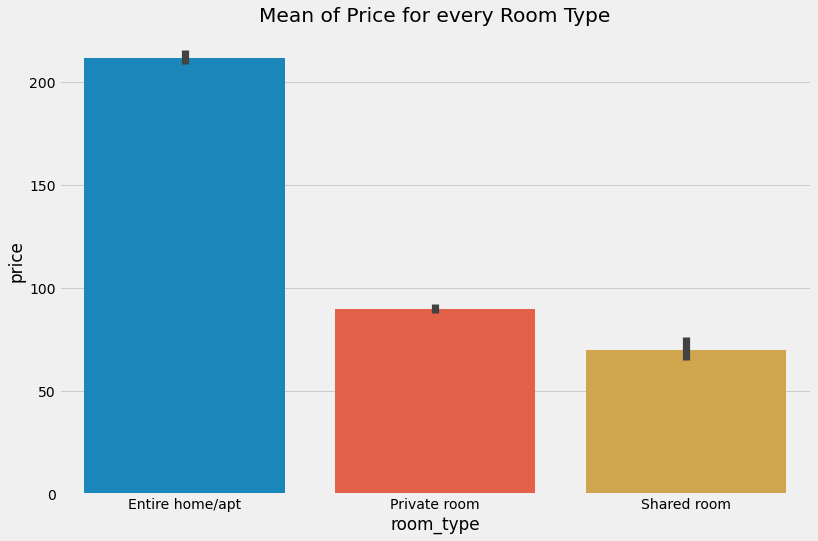

In [33]:
fig,ax=plt.subplots(figsize=(12,8))
sns.barplot(x='room_type', y='price', data=df, order=df['room_type'].value_counts().index)
plt.title('Mean of Price for every Room Type')
plt.show()

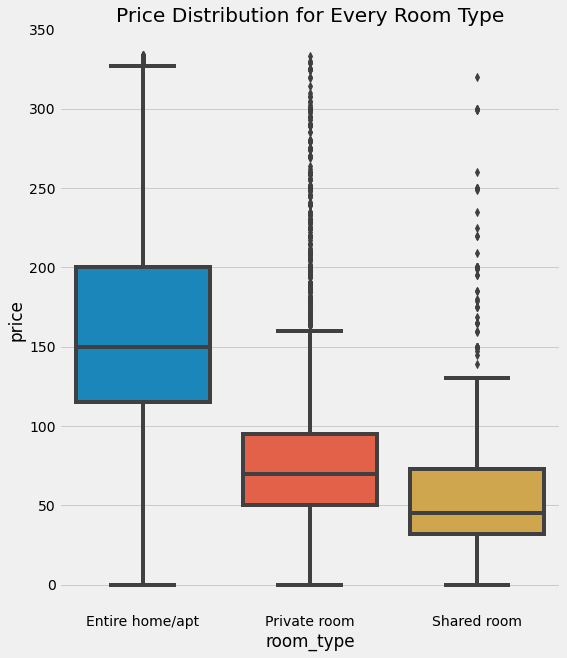

In [34]:
plt.figure(figsize=(8,10))
sns.boxplot(x='room_type', y='price', data=df[df['price'] <= 334], order=['Entire home/apt', 'Private room', 'Shared room'])
plt.title('Price Distribution for Every Room Type');

        Kenapa Entire home/apt harganya mahal tapi paling banyak laku?

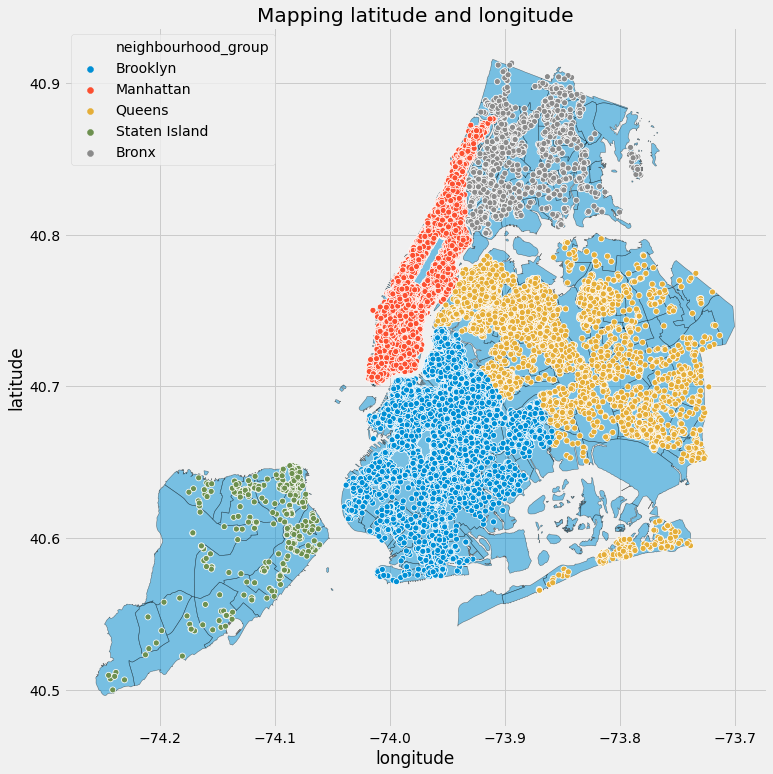

<Figure size 432x288 with 0 Axes>

In [35]:
peta.plot(figsize=(20,12), alpha=0.5, edgecolor='k')
sns.scatterplot(df['longitude'],df['latitude'],hue=df['neighbourhood_group'])
plt.title('Mapping latitude and longitude')
plt.show()
plt.savefig('Mapping latitude and longitude.png')

In [36]:
find_outlier(df['price']).min()

335

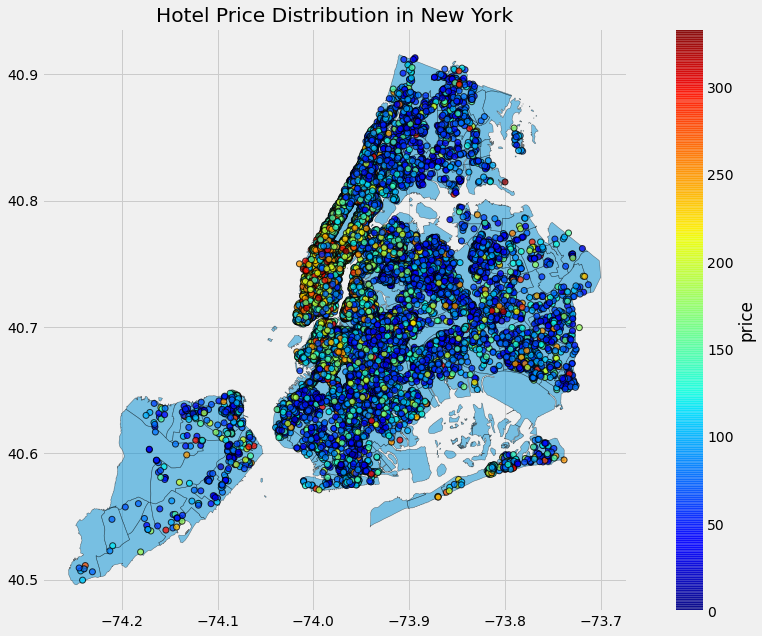

In [37]:
peta.plot(figsize=(15,10), alpha=0.5, edgecolor='k')
plt.scatter(df[df['price'] < 335]['longitude'], df[df['price'] < 335]['latitude'], c=df[df['price'] < 335]['price'], 
            cmap='jet', edgecolor='black', linewidth=1, alpha=0.75)
cbar = plt.colorbar()
cbar.set_label('price')
plt.title('Hotel Price Distribution in New York')
plt.savefig('Hotel Price Distribution in New York.png')
plt.show()


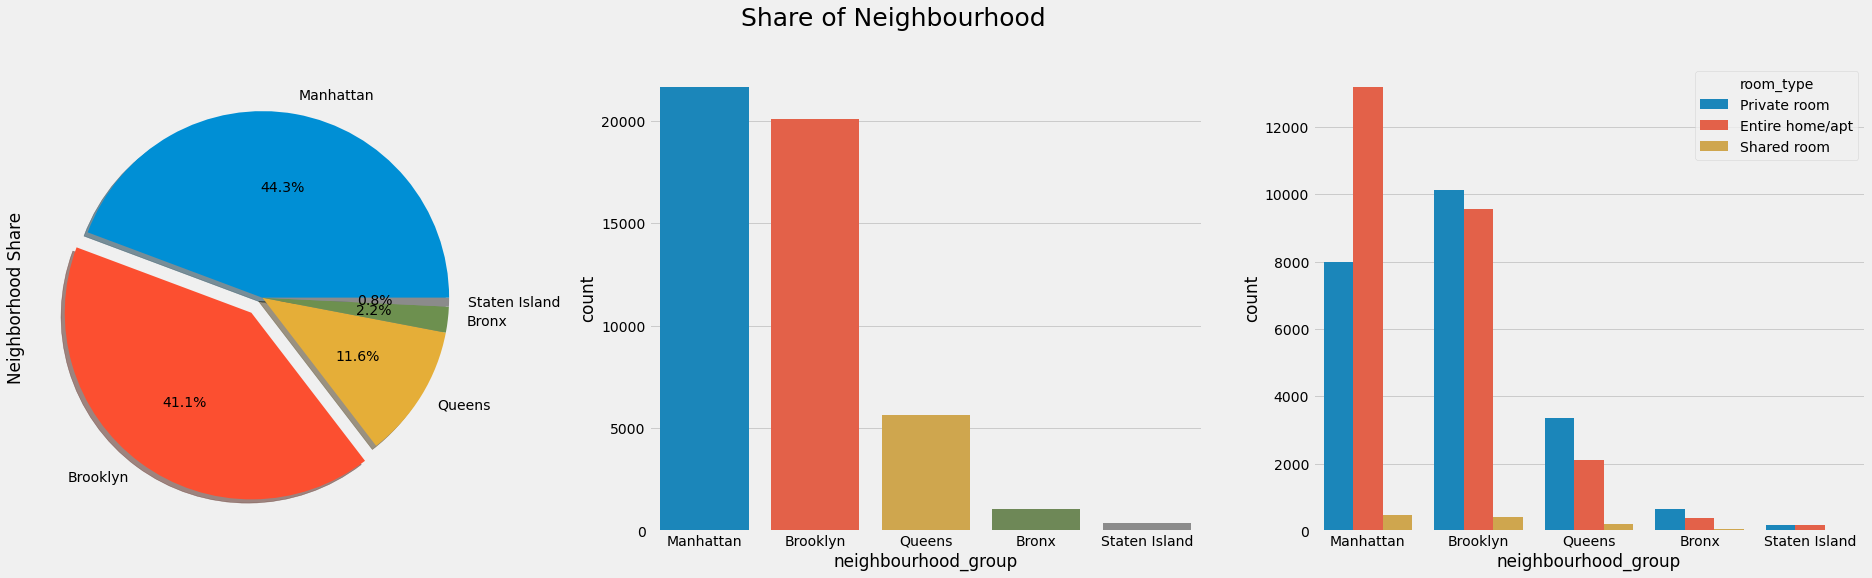

In [38]:
# neighbourhood yang paling banyak
fig,ax=plt.subplots(1,3,figsize=(30,8))
df['neighbourhood_group'].value_counts().plot.pie(explode=[0,0.1,0,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_ylabel('Neighborhood Share')
sns.countplot('neighbourhood_group',data=df,ax=ax[1],order=df['neighbourhood_group'].value_counts().index)
sns.countplot('neighbourhood_group',data=df,ax=ax[2], hue=df['room_type'],order=df['neighbourhood_group'].value_counts().index)
plt.suptitle('Share of Neighbourhood', fontsize=25)
plt.savefig('Share of Neighbourhood.png')

plt.show()

    Entire home/apt paling laku karena paling banyak di kota Manhattan

- Manhattan (New York County) is the geographically smallest and most densely populated borough; is the symbol of New York City, as home to most of the city's skyscrapers and prominent landmarks, including Times Square and Central Park; and may be locally known simply as The City. Manhattan's (New York County's) population density of 72,033 people per square mile (27,812/km2) in 2015 makes it the highest of any county in the United States and higher than the density of any individual U.S. city. Manhattan is the cultural, administrative, and financial center of New York City and contains the headquarters of many major multinational corporations, the United Nations Headquarters, Wall Street, and a number of important universities. Manhattan is often described by Americans as the cultural, financial, media, and entertainment capital of the world. Most of the borough is situated on Manhattan Island, at the mouth of the Hudson River. Several small islands are also part of the borough of Manhattan, including Randall's Island, Wards Island, and Roosevelt Island in the East River, and Governors Island to the south in New York Harbor; Liberty Island, on which the Statue of Liberty stands, is a Manhattan exclave. Manhattan Island is loosely divided into Lower, Midtown, and Uptown regions. Uptown Manhattan is divided by Central Park into the Upper East Side and the Upper West Side, and above the park is Harlem. The borough also includes a small neighborhood on the United States mainland, called Marble Hill. Marble Hill was originally part of Manhattan Island, but is now contiguous with the Bronx after having been severed from Manhattan Island by the construction of the Harlem River Ship Canal south of the neighborhood, and having been connected to the mainland by the subsequent filling in of the Harlem River's original path to the neighborhood's north. New York City's remaining four boroughs are collectively referred to as the outer boroughs.

- Brooklyn (Kings County), on the western tip of Long Island, is the city's most populous borough. Brooklyn is known for its cultural, social, and ethnic diversity, an independent art scene, distinct neighborhoods, and a distinctive architectural heritage. Downtown Brooklyn is the largest central core neighborhood in the outer boroughs. The borough has a long beachfront shoreline including Coney Island, established in the 1870s as one of the earliest amusement grounds in the country. Marine Park and Prospect Park are the two largest parks in Brooklyn. Since 2010, Brooklyn has evolved into a thriving hub of entrepreneurship and high technology startup firms and of postmodern art and design 

- Queens (Queens County), on Long Island north and east of Brooklyn, is geographically the largest borough, the most ethnically diverse county in the United States, as well as the most ethnically diverse urban area in the world. Historically a collection of small towns and villages founded by the Dutch, the borough has since developed both commercial and residential prominence. Downtown Flushing has become one of the busiest central core neighborhoods in the outer boroughs. Queens is the site of Citi Field, the baseball stadium of the New York Mets, and hosts the annual U.S. Open tennis tournament at Flushing Meadows-Corona Park. Additionally, two of the three busiest airports serving the New York metropolitan area, John F. Kennedy International Airport and LaGuardia Airport, are located in Queens. (The third is Newark Liberty International Airport in Newark, New Jersey.)

- The Bronx (Bronx County) is New York City's northernmost borough and the only New York City borough that is part of the United States mainland. It is the location of Yankee Stadium, the baseball stadium of the New York Yankees, and home to the largest cooperatively owned housing complex in the United States, Co-op City. It is also home to the Bronx Zoo, the world's largest metropolitan zoo, which covers 265 acres (107 ha) and houses over 6,000 animals. Directly to the zoo's north is the New York Botanical Garden, a botanical garden and National Historic Landmark. Pelham Bay Park is the largest park in New York City, at 2,772 acres (1,122 ha)

- Staten Island (Richmond County) is the most suburban in character of the five boroughs. Staten Island is connected to Brooklyn by the Verrazzano-Narrows Bridge and to Manhattan by way of the Staten Island Ferry, a free commuter ferry and popular tourist attraction which provides unobstructed views of the Statue of Liberty, Ellis Island, and Lower Manhattan. In central Staten Island, the Staten Island Greenbelt spans approximately 2,500 acres (10 km2), including 28 miles (45 km) of walking trails and one of the last undisturbed forests in the city. Designated in 1984 to protect the island's natural lands, the Greenbelt comprises seven city parks.

Reference : https://en.wikipedia.org/wiki/Boroughs_of_New_York_City

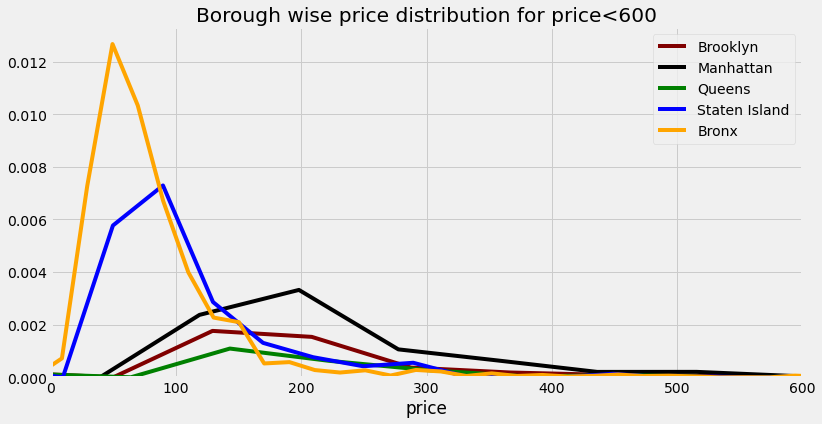

In [39]:
ng = df['neighbourhood_group'].unique().tolist()
color = ['maroon', 'black', 'green', 'blue', 'orange']
c = 0

plt.figure(figsize=(12,6))
for i in ng:
    sns.distplot(df[df['neighbourhood_group'] == i]['price'], color=color[c], hist=False, label=i)
    c += 1
    
plt.title('Borough wise price distribution for price<600')
plt.xlim(0,600)
plt.savefig('Borough wise price distribution.png')
plt.show()




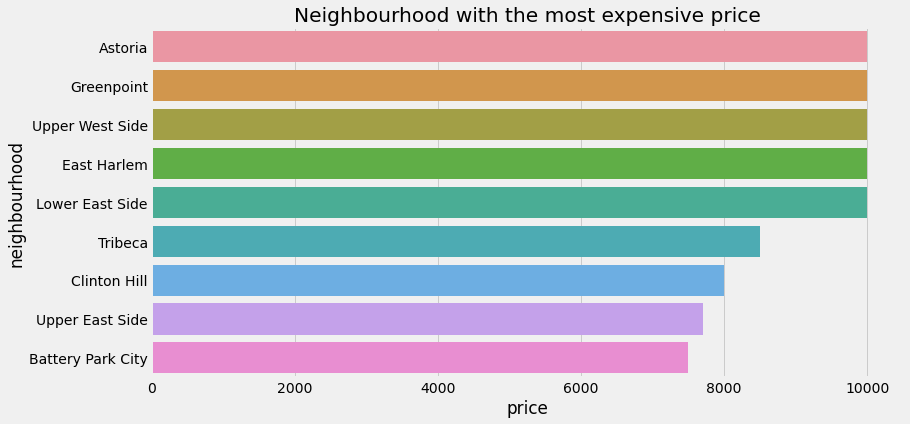

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(y="neighbourhood", x="price", data=df.nlargest(10,['price']))
plt.title('Neighbourhood with the most expensive price')
plt.savefig('Neighbourhood with the most expensive price.png')
plt.show()

    Astoria, Greenpoint, Upper West Side, East Harlem, and Lower East Side have the the most expensive rooms

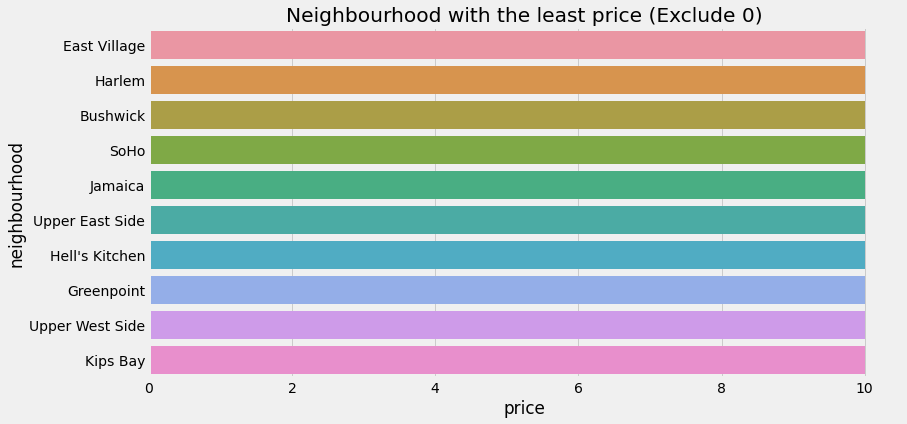

In [41]:
plt.figure(figsize=(12,6))
sns.barplot(y="neighbourhood", x="price", data=df[df['price'] > 0].nsmallest(10,['price']))
plt.title('Neighbourhood with the least price (Exclude 0)')
plt.savefig('Neighbourhood with the least price.png')
plt.show()

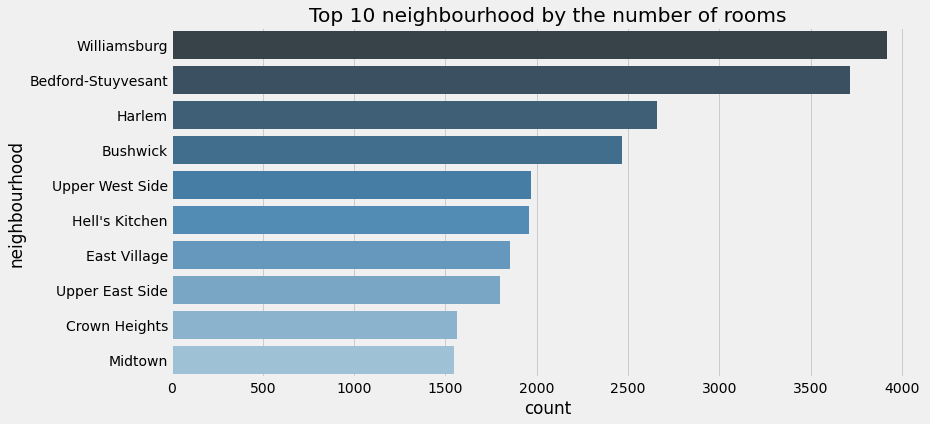

In [42]:
top_10_neighbourhood_by_room = pd.DataFrame(df['neighbourhood'].value_counts().head(10))
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='neighbourhood', order=top_10_neighbourhood_by_room.index, palette="Blues_d")
plt.title('Top 10 neighbourhood by the number of rooms')
plt.savefig('Top 10 neighbourhood by the number of rooms.png')
plt.show()

## Who Is The Busiest Host?

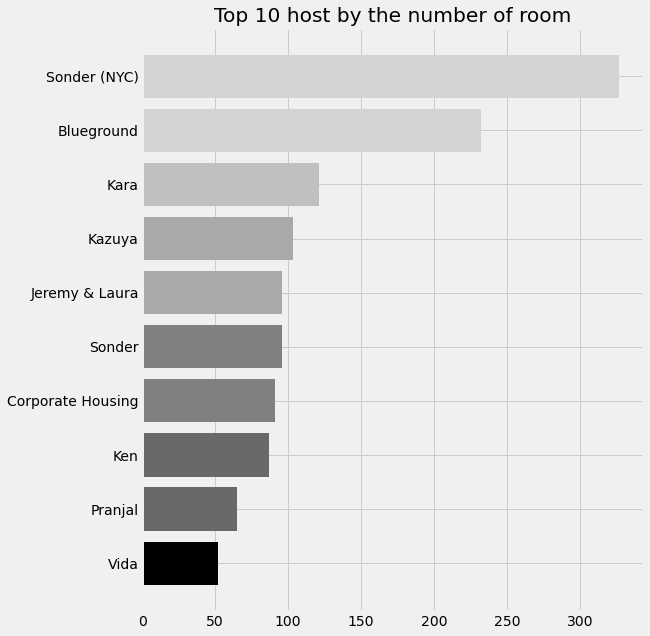

In [43]:
top_10_host_who_shared_room_in_airbnb = df['host_id'].value_counts().head(10)
top_10_host_who_shared_room_in_airbnb = pd.DataFrame(top_10_host_who_shared_room_in_airbnb).T
top_10_host_who_shared_room_in_airbnb.columns = ['Sonder (NYC)', 'Blueground', 'Kara', 'Kazuya', 'Sonder', 'Jeremy & Laura', 'Corporate Housing', 'Ken', 'Pranjal', 'Vida']
top_10_host_who_shared_room_in_airbnb = top_10_host_who_shared_room_in_airbnb.T
top_10_host_who_shared_room_in_airbnb['host_name'] = top_10_host_who_shared_room_in_airbnb.index
top_10_host_who_shared_room_in_airbnb.index = np.arange(len(top_10_host_who_shared_room_in_airbnb.index))

plt.figure(figsize=(8,10))
plt.barh(top_10_host_who_shared_room_in_airbnb.sort_values('host_id', ascending=True)['host_name'], 
         top_10_host_who_shared_room_in_airbnb.sort_values('host_id', ascending=True)['host_id'],
         color=['black', 'dimgray', 'dimgrey', 'gray', 'grey', 'darkgray', 'darkgrey', 'silver', 'lightgray', 'lightgrey']
        )
plt.title('Top 10 host by the number of room')
plt.savefig('Top 10 host by the number of room.png')
plt.show()


## Is There Any Correlation between Price and Minimum Nights?

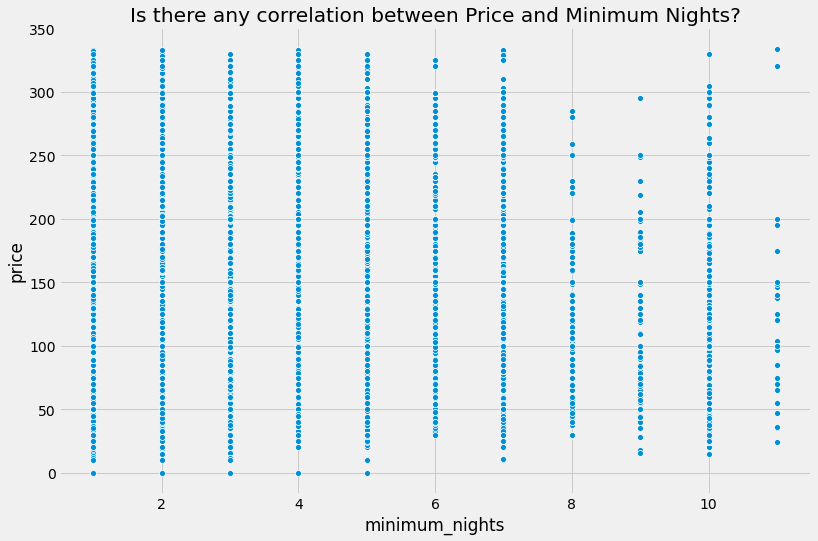

In [44]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df[(df['minimum_nights'] < 12) & (df['price'] < 335)], x='minimum_nights', y='price')
plt.title('Is there any correlation between Price and Minimum Nights?')
plt.show()

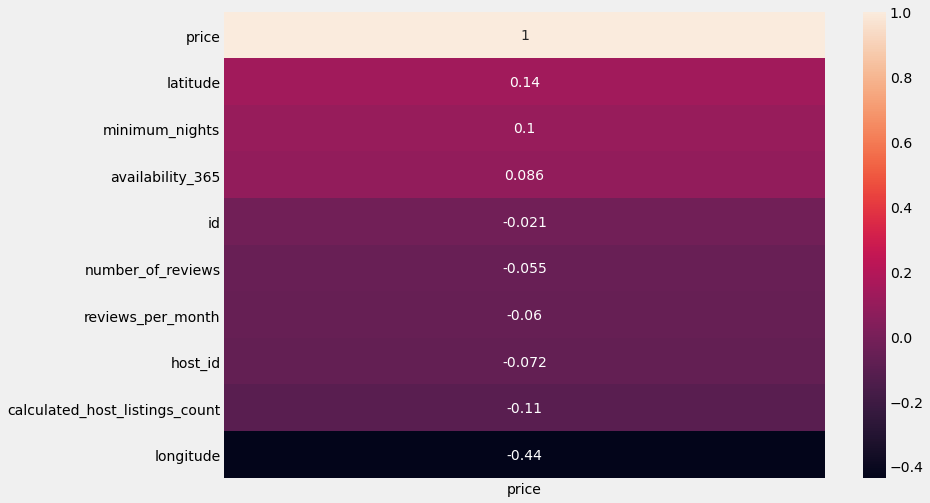

In [45]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(method='spearman')[['price']].sort_values('price', ascending=False), annot=True)
plt.show()

There is no correlation between `price` and `minimum_nights`

## Availability of Rooms

In [46]:
df[df['availability_365'] >350]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1970-01-01,0.00,1,365
22,8025,CBG Helps Haiti Room#2.5,22486,Lisel,Brooklyn,Park Slope,40.67989,-73.97798,Private room,80,1,39,2019-01-01,0.37,6,364
30,9668,front room/double bed,32294,Ssameer Or Trip,Manhattan,Harlem,40.82245,-73.95104,Private room,50,3,242,2019-06-01,2.04,3,355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48873,36477307,Brooklyn paradise,241945355,Clement & Rose,Brooklyn,Flatlands,40.63116,-73.92616,Entire home/apt,170,1,0,1970-01-01,0.00,2,363
48880,36481315,The Raccoon Artist Studio in Williamsburg New ...,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,120,1,0,1970-01-01,0.00,3,365
48883,36482416,Sunny Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79755,-73.93614,Private room,75,2,0,1970-01-01,0.00,2,364
48885,36482809,Stunning Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79633,-73.93605,Private room,75,2,0,1970-01-01,0.00,2,353


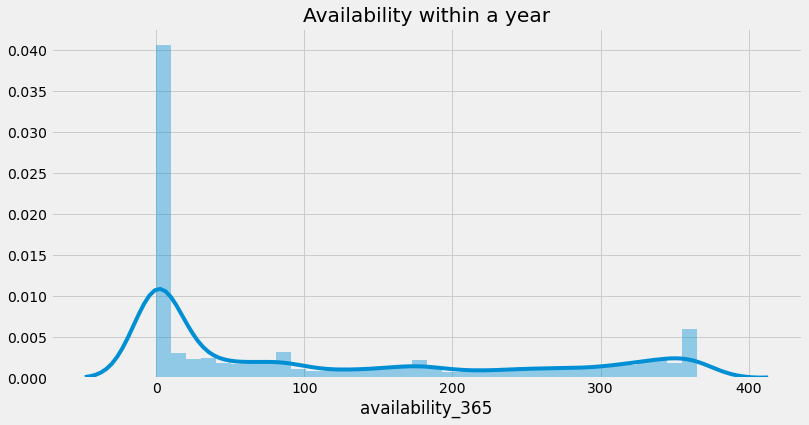

In [47]:
plt.figure(figsize=(12,6))
sns.distplot(df['availability_365'], kde=True, label='availability_365', bins=36)
plt.title('Availability within a year')
plt.show()

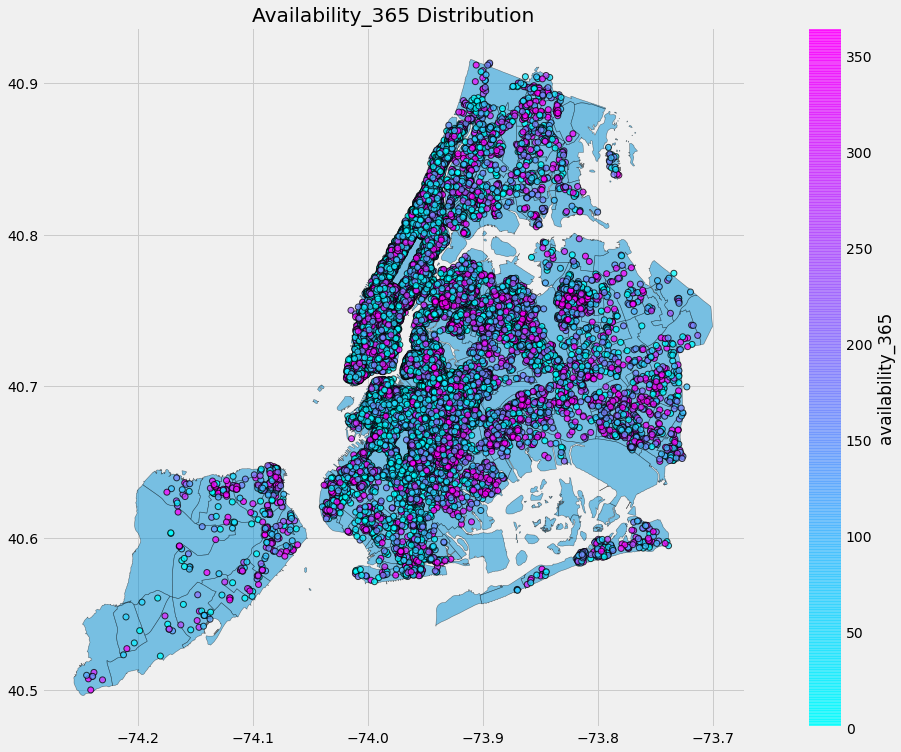

In [48]:
peta.plot(figsize=(20,12), alpha=0.5, edgecolor='k')
plt.scatter(df['longitude'], df['latitude'], c=df['availability_365'], cmap='cool', edgecolor='black', linewidth=1, alpha=0.75)
cbar = plt.colorbar()
cbar.set_label('availability_365')
plt.title('Availability_365 Distribution')
plt.show()

In [49]:
df['availability_365'].value_counts()

0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
196       24
183       24
181       23
202       20
Name: availability_365, Length: 366, dtype: int64

        Most of the room available for 0 or a whole days in a year

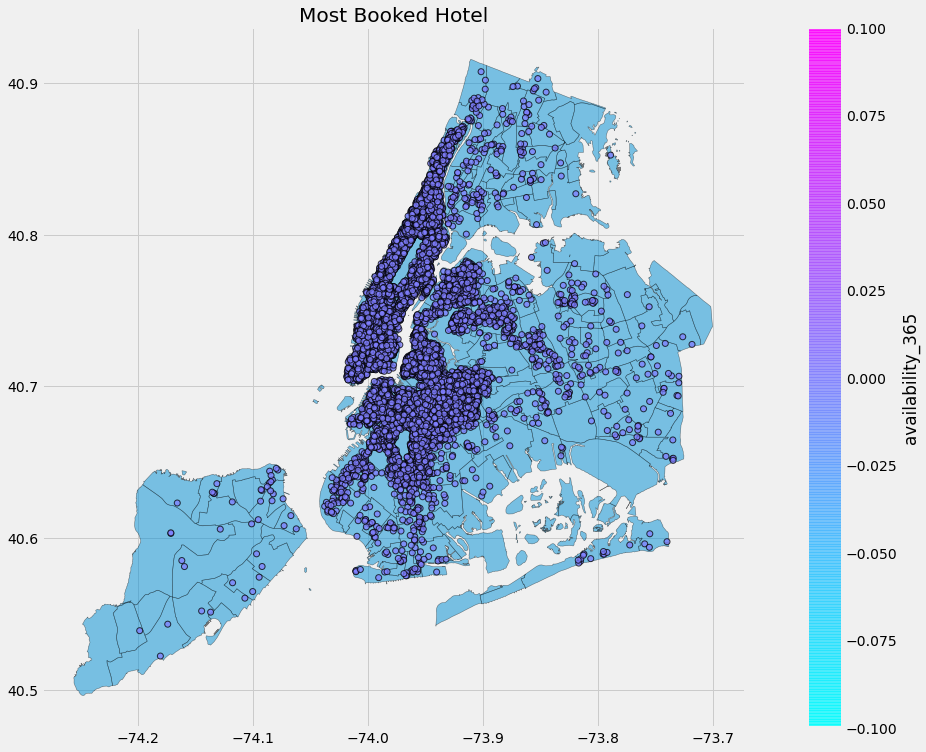

In [50]:
peta.plot(figsize=(20,12), alpha=0.5, edgecolor='k')
plt.scatter(df[df['availability_365'] == 0]['longitude'], df[df['availability_365'] == 0]['latitude'], c=df[df['availability_365'] == 0]['availability_365'], 
            cmap='cool', edgecolor='black', linewidth=1, alpha=0.75)
cbar = plt.colorbar()
cbar.set_label('availability_365')
plt.title('Most Booked Hotel')
plt.savefig('Most Booked Hotel.png')
plt.show()

In [51]:
df[df['availability_365'] == 0]['neighbourhood_group'].value_counts()

Manhattan        8102
Brooklyn         7844
Queens           1368
Bronx             177
Staten Island      42
Name: neighbourhood_group, dtype: int64

**Manhattan dan Broklyn paling penuh**

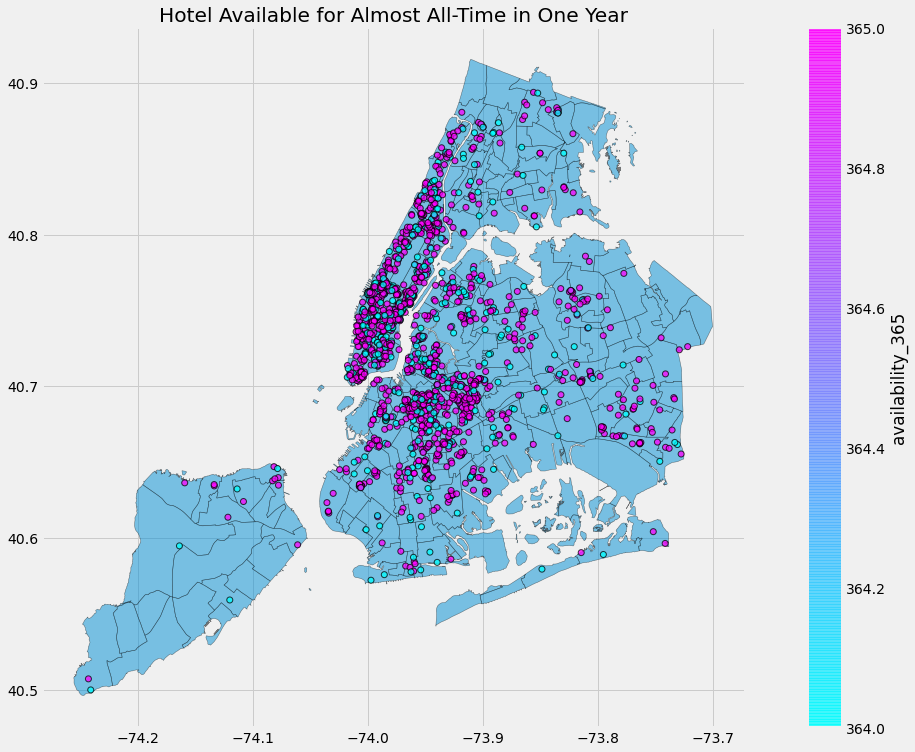

In [52]:
peta.plot(figsize=(20,12), alpha=0.5, edgecolor='k')
plt.scatter(df[df['availability_365'] >=364]['longitude'], df[df['availability_365'] >=364]['latitude'], c=df[df['availability_365'] >=364]['availability_365'], 
            cmap='cool', edgecolor='black', linewidth=1, alpha=0.75)
cbar = plt.colorbar()
cbar.set_label('availability_365')
plt.title('Hotel Available for Almost All-Time in One Year')
plt.savefig('Hotel Available for Almost All-Time in One Year.png')
plt.show()

In [53]:
df[df['availability_365'] >=364]['neighbourhood_group'].value_counts()

Manhattan        818
Brooklyn         606
Queens           269
Bronx             76
Staten Island     17
Name: neighbourhood_group, dtype: int64

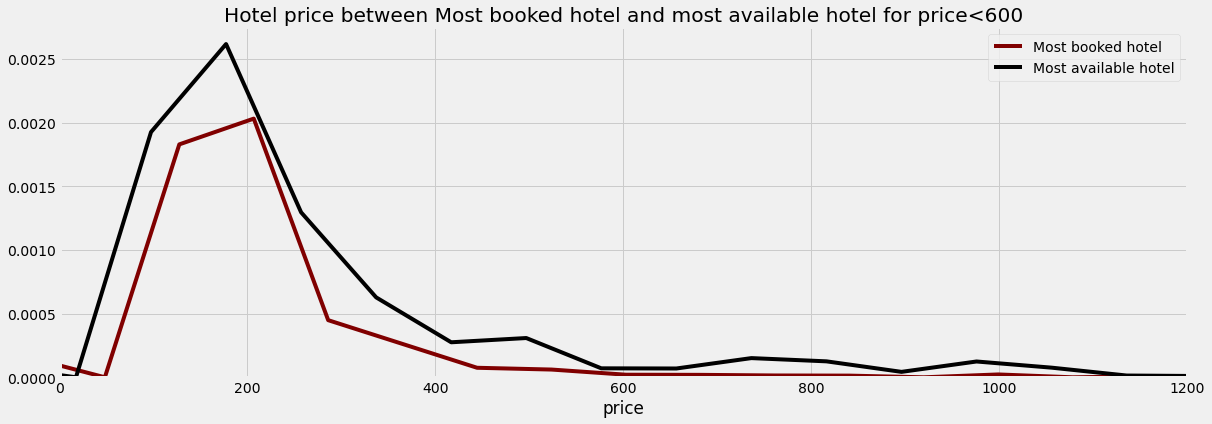

In [54]:

plt.figure(figsize=(18,6))
sns.distplot(df[df['availability_365'] == 0]['price'], color='maroon', hist=0, label='Most booked hotel')
sns.distplot(df[df['availability_365'] >= 364]['price'], color='black', hist=0, label='Most available hotel')

plt.title('Hotel price between Most booked hotel and most available hotel for price<600')
plt.xlim(0,1200)
plt.show()

---

## Number of Review & Price

In [55]:
df['number_of_reviews'].value_counts()

0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
404        1
436        1
388        1
341        1
607        1
Name: number_of_reviews, Length: 394, dtype: int64

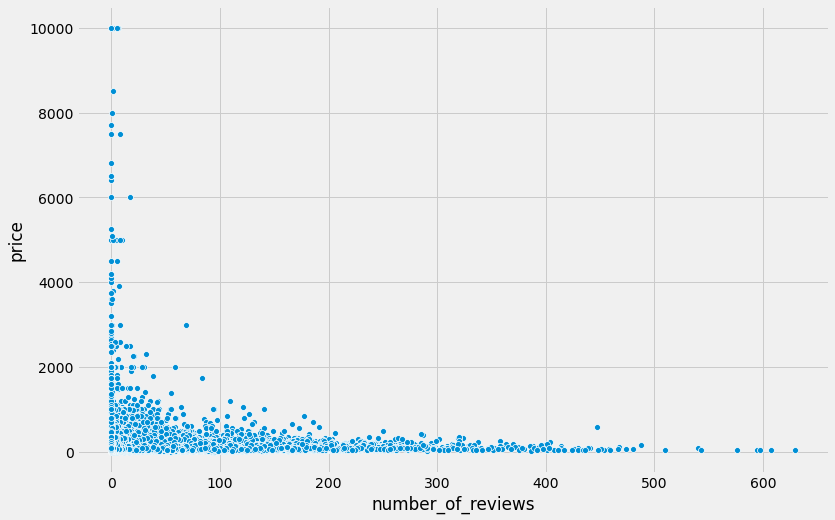

In [56]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='number_of_reviews', y='price', data=df)
plt.show()

    Harga yang lebih murah cenderung memiliki number_of_reviews yang lebih banyak

## Calculated_host_listing and Price

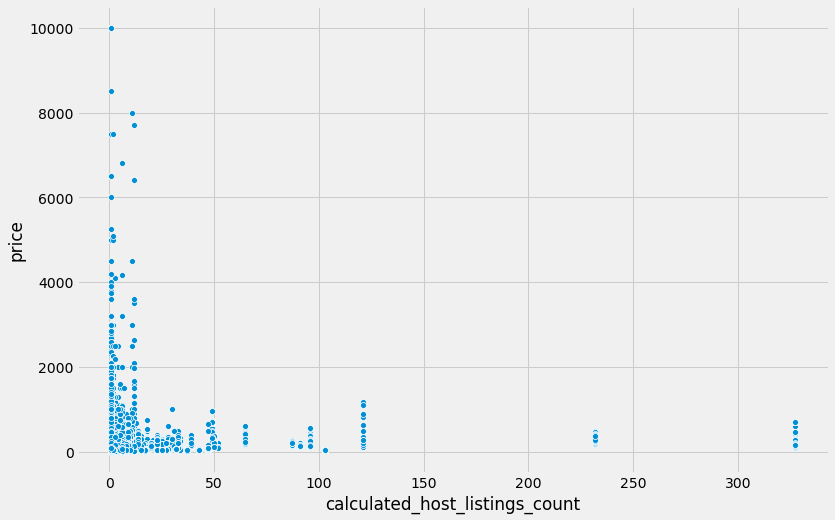

In [57]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='calculated_host_listings_count', y='price', data=df)
plt.show()

`calculated_host_listings_count` yang lebih sedikit justru harganya banyak yang lebih mahal

## Reviews_per_month and Price

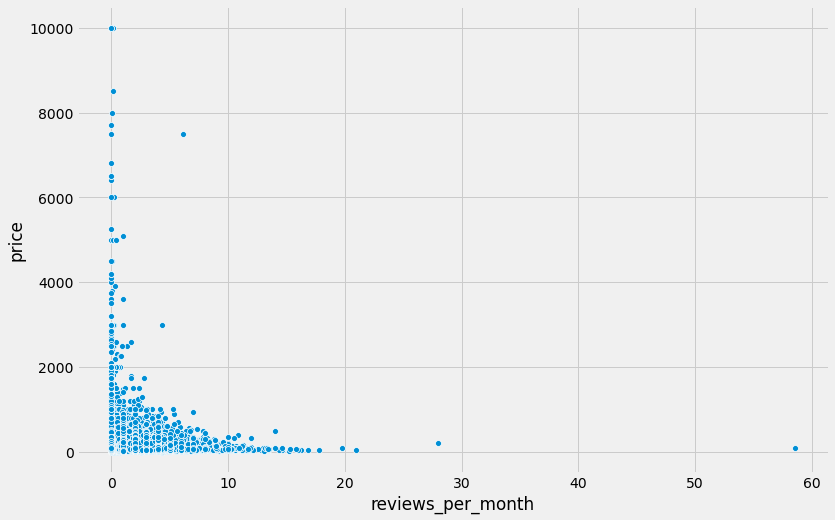

In [58]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='reviews_per_month', y='price', data=df)
plt.show()

`reviews_per_month` makin sedkit ternyata harganya juga lebih mahal

## Availability and Area

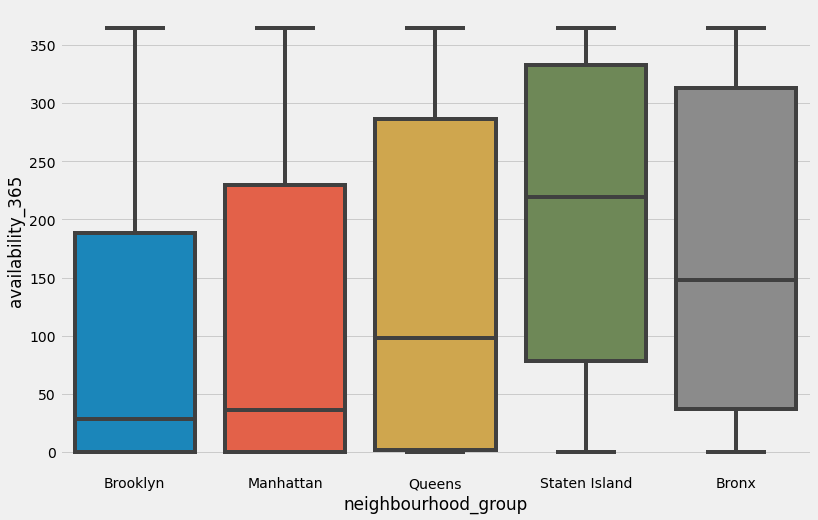

In [67]:
plt.figure(figsize=(12,8))
sns.boxplot(x='neighbourhood_group', y='availability_365', data=df)
plt.show()

Area Brooklyn memiliki availability yang paling sedikit dalam setahun, yang paling Staten Island, dan Bronx